# COVID-19 Data Set


> ##### Antes de cargar el csv, he modificado los datos faltantes en el propio archivo, tales como 97, 99 o la fecha 9999-99-99. Así puedo trabajar más cómodo con los datos.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [100]:
df = pd.read_csv('Covid-Dataset.csv')
df.head()

/tmp/ipykernel_9019/973827582.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Covid-Dataset.csv')


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,NaN,1.0,65,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN
1,2,1,2,1,03/06/2020,NaN,1.0,72,NaN,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,5,NaN
2,2,1,2,2,09/06/2020,1.0,2.0,55,NaN,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3,2.0
3,2,1,1,1,12/06/2020,NaN,2.0,53,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,7,NaN
4,2,1,2,1,21/06/2020,NaN,2.0,68,NaN,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,3,NaN


En las Boolean features, 1 significa "sí" y 2 significa "no". Valores como 97 y 99 son datos faltantes.

## Análisis exploratorio


In [101]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,192706.000000,1.032572e+06,1.048575e+06,521310.000000,1.045237e+06,1.045572e+06,1.045596e+06,1.045171e+06,1.045471e+06,1.043530e+06,1.045499e+06,1.045543e+06,1.045569e+06,1.045355e+06,1.048575e+06,192543.000000
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,1.825351,1.864379e+00,4.179410e+01,1.984403,1.880420e+00,1.985594e+00,1.969805e+00,1.986442e+00,1.844349e+00,1.973130e+00,1.980135e+00,1.847145e+00,1.981920e+00,1.919285e+00,5.305653e+00,1.912446
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,0.379668,3.423854e-01,1.690739e+01,0.123911,3.244694e-01,1.191554e-01,1.711242e-01,1.156451e-01,3.625247e-01,1.617045e-01,1.395369e-01,3.598474e-01,1.332413e-01,2.723973e-01,1.881165e+00,0.282647
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,3.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,2.000000
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,2.000000,2.000000e+00,4.000000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,2.000000
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,2.000000,2.000000e+00,5.300000e+01,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,2.000000,2.000000e+00,1.210000e+02,2.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,2.000000


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   USMER                 1048575 non-null  int64  
 1   MEDICAL_UNIT          1048575 non-null  int64  
 2   SEX                   1048575 non-null  int64  
 3   PATIENT_TYPE          1048575 non-null  int64  
 4   DATE_DIED             76942 non-null    object 
 5   INTUBED               192706 non-null   float64
 6   PNEUMONIA             1032572 non-null  float64
 7   AGE                   1048575 non-null  int64  
 8   PREGNANT              521310 non-null   float64
 9   DIABETES              1045237 non-null  float64
 10  COPD                  1045572 non-null  float64
 11  ASTHMA                1045596 non-null  float64
 12  INMSUPR               1045171 non-null  float64
 13  HIPERTENSION          1045471 non-null  float64
 14  OTHER_DISEASE         1043530 non-

- El conjunto de entrenamiento tiene 1,048,575 ejemplos y 21 características. 
- 6 de las features son int, 1 es un objetc y 14 son float.

### Desbalanceo de clases

<AxesSubplot: xlabel='CLASIFFICATION_FINAL', ylabel='count'>

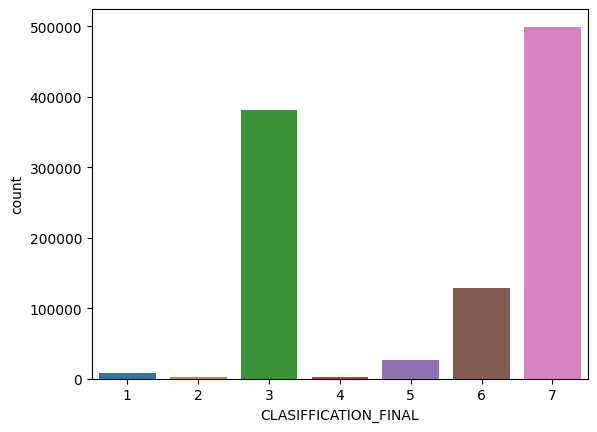

In [103]:
sns.countplot(x='CLASIFFICATION_FINAL', data=df)

Los valores 1-3 significan que el paciente fue diagnosticado con covid en diferentes grados. 4 o superior significa que el paciente no es portador de covid o que la prueba no es concluyente.

> Se observa que hay más gente cuyo diagnostico final no fue COVID. Aún así, tomamos todos los valores para tenerlos en cuenta.

### Exploración de variables

<AxesSubplot: xlabel='DATE_DIED', ylabel='count'>

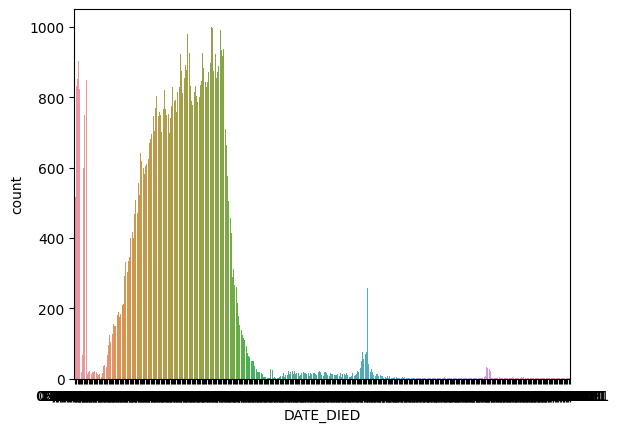

In [104]:
sns.countplot(x='DATE_DIED', data=df)

> Casi 20,000 personas sobrevivieron al virus, el resto murió

<AxesSubplot: xlabel='AGE', ylabel='count'>

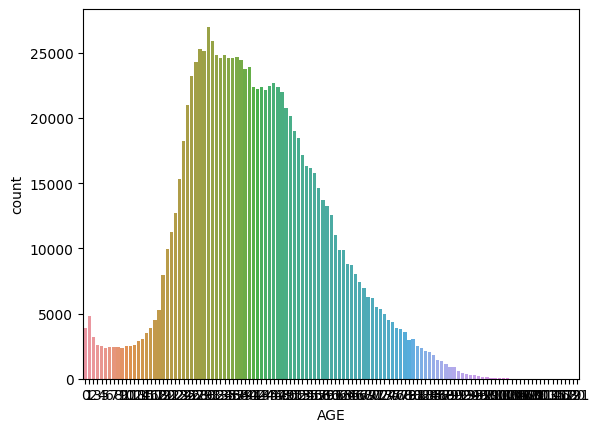

In [105]:
sns.countplot(x='AGE', data=df)

> La mayoría de los pacientes son gente joven y gente cercana a la mediana edad.

> #### A continuación, he seleccionado como ejes las variables AGE y CLASIFFICATION_FINAL para poder tener los datos más dispersados y así observalos mejor sin que se unan tanto entre ellos.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


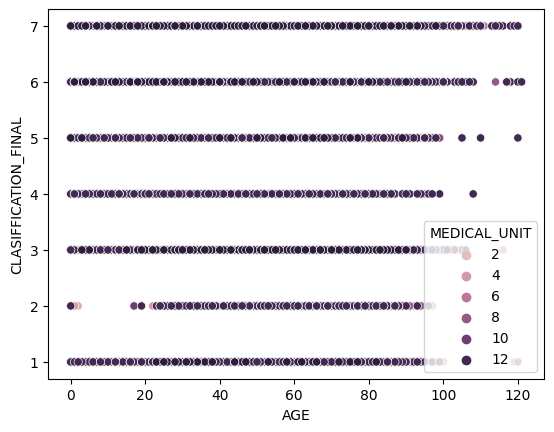

In [106]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='MEDICAL_UNIT', data=df)

> No tengo ni idea de lo que significa

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

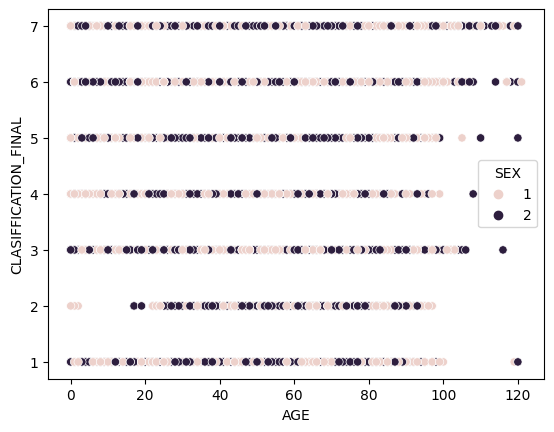

In [107]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='SEX', data=df)

> Como era de esperar, el sexo no es un causante de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


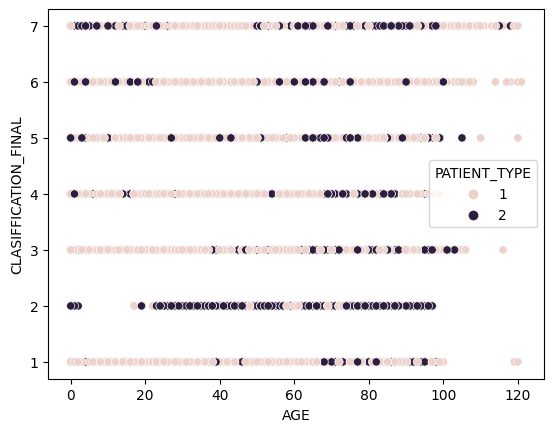

In [108]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PATIENT_TYPE', data=df)

> La gran mayoría de los pacientes con COVID grado 2 fueron hospitalizados

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

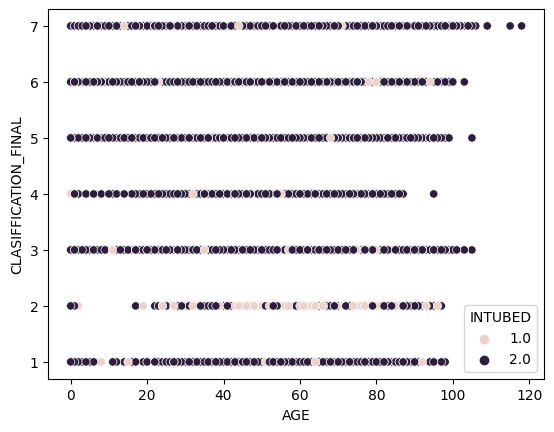

In [109]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='INTUBED', data=df)

> Los pacientes de COVID grado 2 eran más propensos a ser intubados.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

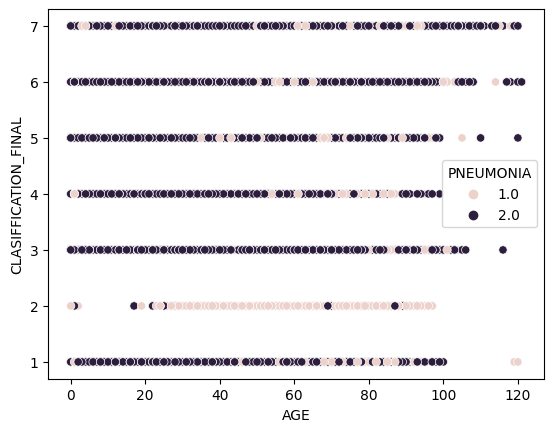

In [110]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PNEUMONIA', data=df)

> Se puede observar una clara "dependencia" entre la neumonía y el COVID. En los pacientes con COVID grado 2, la neumonía es casi total.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

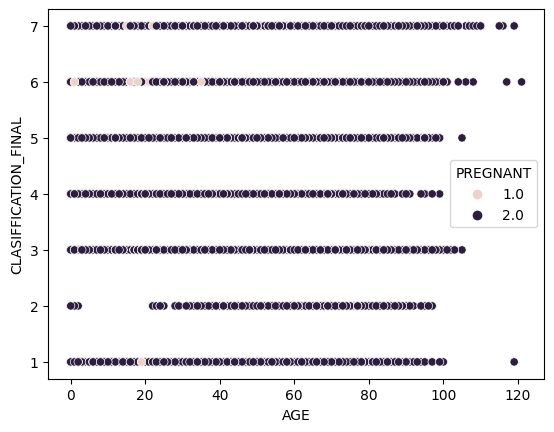

In [111]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='PREGNANT', data=df)

> No hubo casi ninguna embarazada con COVID, además de que no es causante de él.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


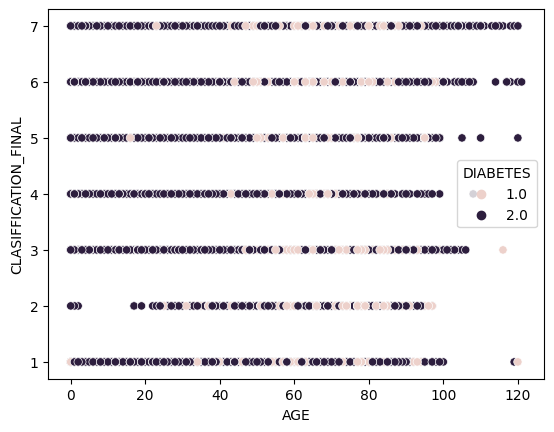

In [112]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='DIABETES', data=df)

> La gente de mediana edad en adelante es más propensa a tener diabetes, aunque no se le ve relación directa con la COVID. Como se puede ver, en los niveles 6 y 7 hay casi los mismos casos que en los niveles 2 y 3.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


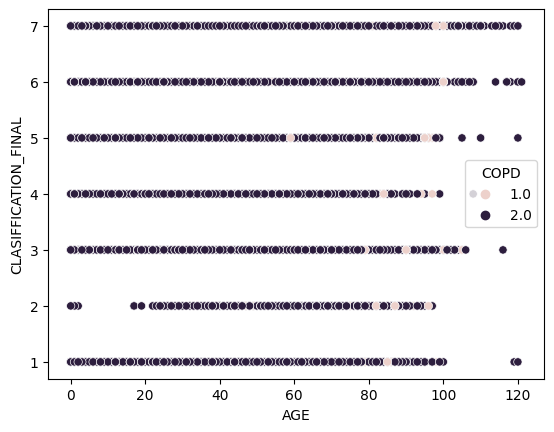

In [113]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='COPD', data=df)

> Apenas hay pacientes con COPD y encima se ve que no causa COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


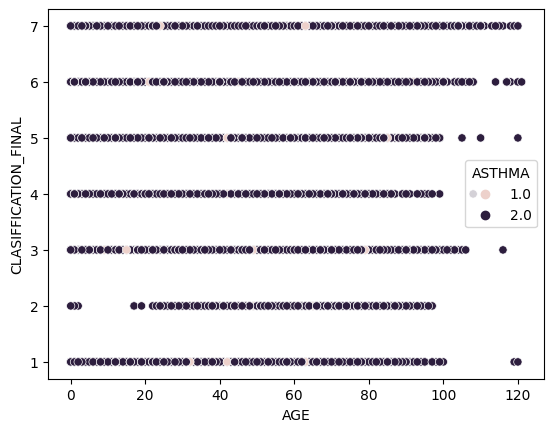

In [114]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='ASTHMA', data=df)

> No considero el asma como causante o derivación de la COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


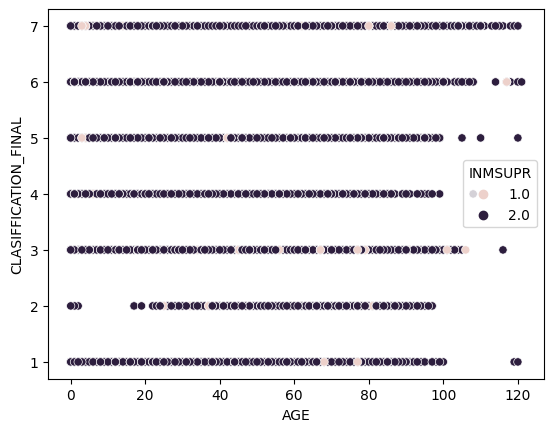

In [115]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='INMSUPR', data=df)

> Apenas hay pacientes inmunodeprimidos y no es causa ni derivación del COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


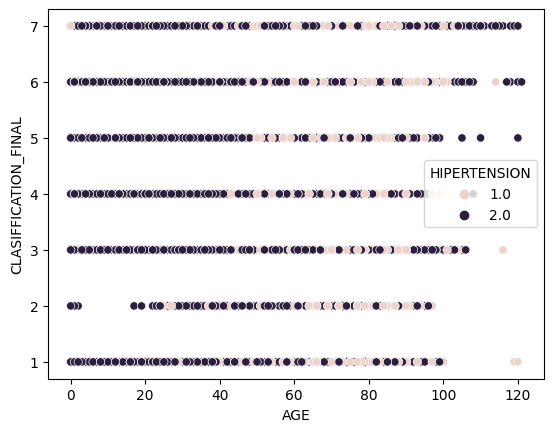

In [116]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='HIPERTENSION', data=df)

> La gente de la mediana edad en adelante tienen hipertensión pero no lo consideraría como causa del COVID

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


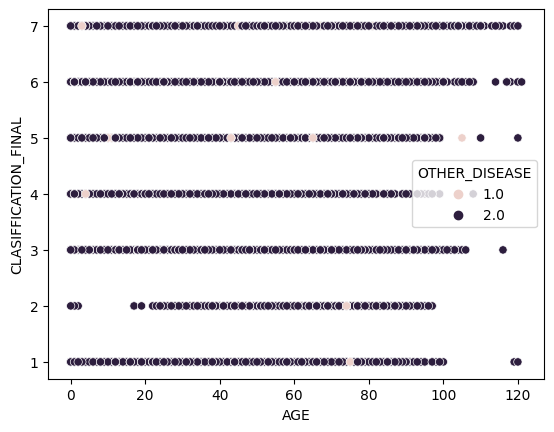

In [117]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='OTHER_DISEASE', data=df)

> Apenas habían pacientes que padecían de alguna otra enfermedad.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


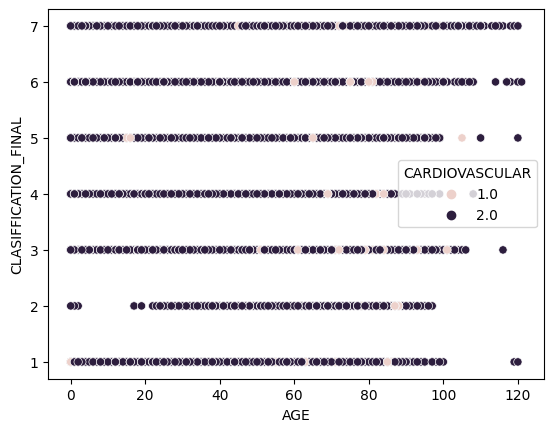

In [118]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='CARDIOVASCULAR', data=df)

> Un muy pequeño porcentaje de personas de mediana edad en adelante presenta alguna enfermedad cardiovascular.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


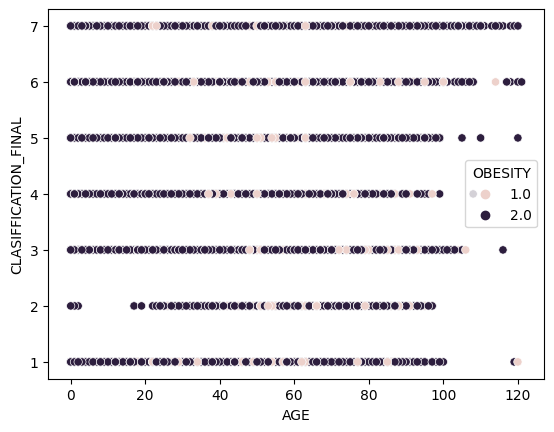

In [119]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='OBESITY', data=df)

> Un porcentaje de personas de mediana edad en adelante tiene obesidad, pero no se lo considero como causante de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


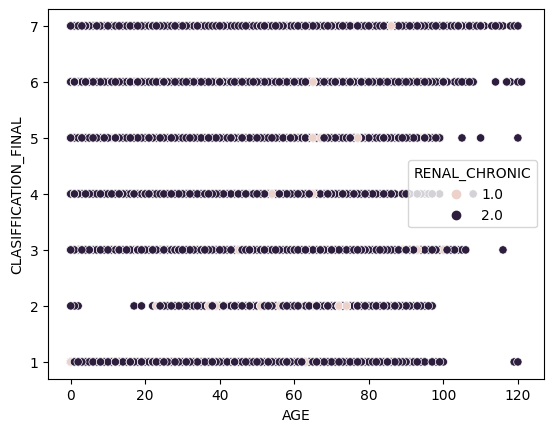

In [120]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='RENAL_CHRONIC', data=df)

> Casi ningún paciente presenta una enfermedad renal crónica, aunque si que hay un ligero aumento en el grado 2 de COVID.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


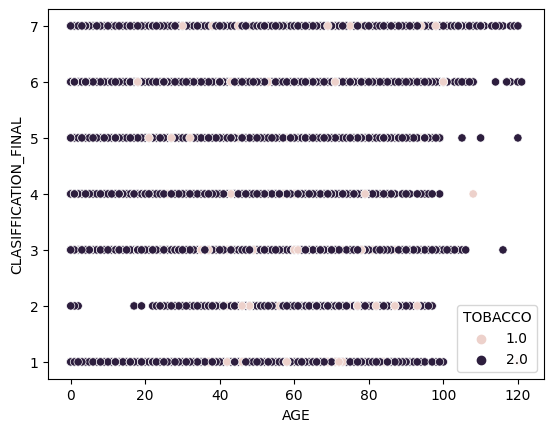

In [121]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='TOBACCO', data=df)

<AxesSubplot: xlabel='PNEUMONIA', ylabel='CLASIFFICATION_FINAL'>

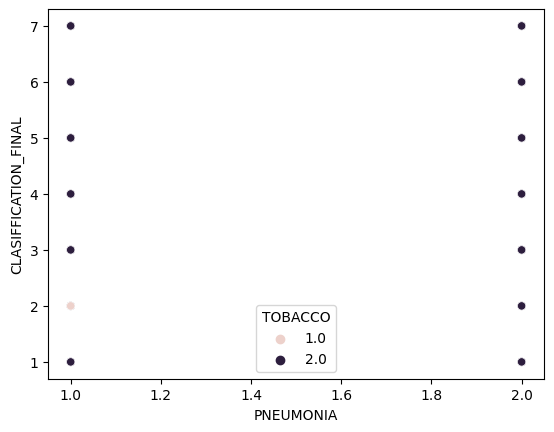

In [122]:
sns.scatterplot(x='PNEUMONIA', y='CLASIFFICATION_FINAL', hue='TOBACCO', data=df)

> En los casos de COVID se aprecia como hay más gente fumadora. Esto puede ser debido a que el virus se pueda propagar por las partículas del humo al fumar. A su vez, el tabaco está relacionado con la neumonía.

<AxesSubplot: xlabel='AGE', ylabel='CLASIFFICATION_FINAL'>

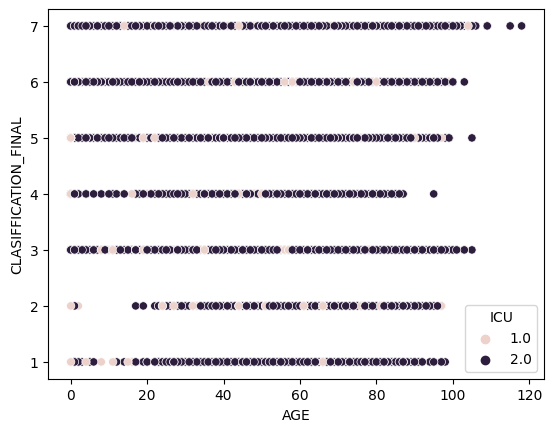

In [123]:
sns.scatterplot(x='AGE', y='CLASIFFICATION_FINAL', hue='ICU', data=df)

> Pacientes de Covid grado 1 y 2 fueron ingresados en la Unidad de Cuidados Intensivos.

## Preprocesamiento de los datos

### Valores nulos

In [124]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = round(df.isnull().sum()/df.isnull().count()*100, 1).sort_values(ascending=False)

missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
DATE_DIED,971633,92.7
ICU,856032,81.6
INTUBED,855869,81.6
PREGNANT,527265,50.3
PNEUMONIA,16003,1.5
OTHER_DISEASE,5045,0.5
INMSUPR,3404,0.3
DIABETES,3338,0.3
TOBACCO,3220,0.3
HIPERTENSION,3104,0.3


- Las features `ASTHMA | COPD | RENAL_CHRONIC | OBESITY | CARDIOVASCULAR | HIPERTENSION | TOBACCO | DIABETES | INMSUPR | OTHER_DISEASE | PNEUMONIA` tiene muy poco valores nulos, por lo que se pueden completar fácilmente.
- La feature `PREGNANT` se presenta más complicada, ya que tiene el 50.3% de valores nulos.
- Las features `INTUBED | ICU` necesita más investigación, pero parece que podríamos querer eliminarla del conjunto de datos, ya que falta el 81.6%.
- La feature `DATE_DIED` no la modifico ya que significa que no han muerto.

**Primeras features mencionadas**

Como tienen muy pocos valores nulos, los rellenaremos con el más común

In [125]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='most_frequent')

df['ASTHMA'] = imp.fit_transform(df)
df['COPD'] = imp.fit_transform(df)
df['RENAL_CHRONIC'] = imp.fit_transform(df)
df['OBESITY'] = imp.fit_transform(df)
df['CARDIOVASCULAR'] = imp.fit_transform(df)
df['HIPERTENSION'] = imp.fit_transform(df)
df['TOBACCO'] = imp.fit_transform(df)
df['DIABETES'] = imp.fit_transform(df)
df['INMSUPR'] = imp.fit_transform(df)
df['OTHER_DISEASE'] = imp.fit_transform(df)
df['PNEUMONIA'] = imp.fit_transform(df)


df['ASTHMA'].isnull().sum()
df['COPD'].isnull().sum()
df['RENAL_CHRONIC'].isnull().sum()
df['OBESITY'].isnull().sum()
df['CARDIOVASCULAR'].isnull().sum()
df['HIPERTENSION'].isnull().sum()
df['TOBACCO'].isnull().sum()
df['DIABETES'].isnull().sum()
df['INMSUPR'].isnull().sum()
df['OTHER_DISEASE'].isnull().sum()
df['PNEUMONIA'].isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Name: PNEUMONIA, Length: 1048575, dtype: bool>

**PREGNANT**

En este caso crearemos una matriz que contenga números aleatorios, que se calculen en función del valor de la media de la edad y la desviación estándar.

<AxesSubplot: >

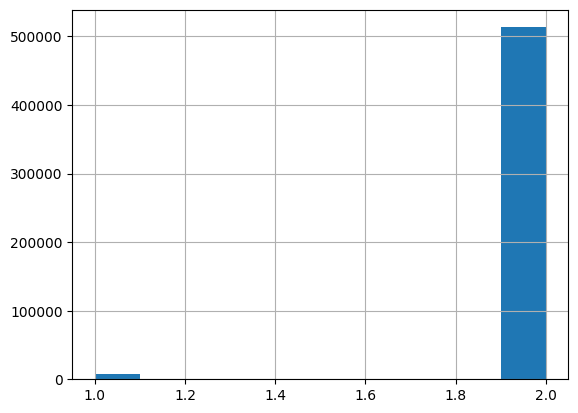

In [126]:
df.PREGNANT.hist()

In [127]:
mean = df["PREGNANT"].mean()
std = df["PREGNANT"].std()
is_null = df["PREGNANT"].isnull().sum()

rand_PREGNANT = np.random.randint(mean - std, mean + std, size = is_null)

PREGNANT_slice = df["PREGNANT"].copy()
PREGNANT_slice[np.isnan(PREGNANT_slice)] = rand_PREGNANT

df["PREGNANT"] = PREGNANT_slice
df["PREGNANT"] = df["PREGNANT"].astype(int)

df["PREGNANT"].isnull().sum()

0

**INTUBED**

Como hay tan pocos datos y no serán muy relevantes, los borramos directamente.

In [128]:
df = df.drop(['INTUBED'], axis=1)

**ICU**

Lo mismo que antes

In [129]:
df = df.drop(['ICU'], axis=1)

In [130]:
total = df.isnull().sum().sort_values(ascending=False)

percent_1 = round(df.isnull().sum()/df.isnull().count()*100, 1).sort_values(ascending=False)

missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(20)

,Total,%
DATE_DIED,971633,92.7
USMER,0,0.0
ASTHMA,0,0.0
TOBACCO,0,0.0
RENAL_CHRONIC,0,0.0
OBESITY,0,0.0
CARDIOVASCULAR,0,0.0
OTHER_DISEASE,0,0.0
HIPERTENSION,0,0.0
INMSUPR,0,0.0


Finalmente, las variables se nos quedan así

### Detección de outliers

In [131]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,AGE,PREGNANT,CLASIFFICATION_FINAL
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,4.179410e+01,1.489406e+00,5.305653e+00
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,1.690739e+01,4.998880e-01,1.881165e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,3.000000e+01,1.000000e+00,3.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,5.300000e+01,2.000000e+00,7.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,1.210000e+02,2.000000e+00,7.000000e+00


<AxesSubplot: xlabel='AGE'>

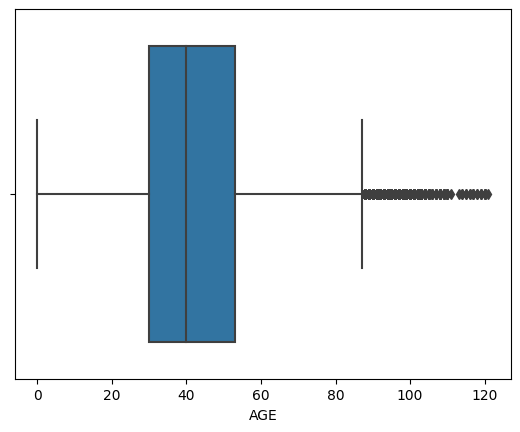

In [132]:
sns.boxplot(x='AGE', data=df)

<AxesSubplot: >

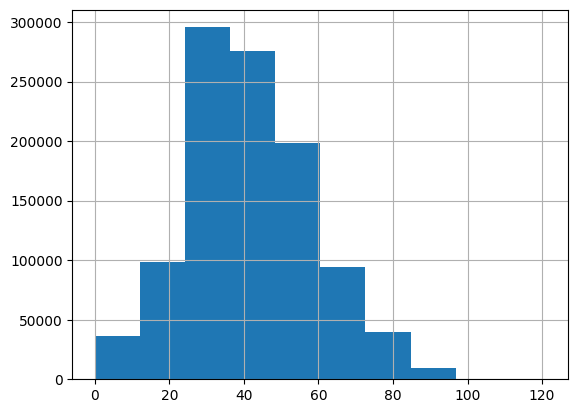

In [133]:
df.AGE.hist()

## Selección de variables

In [134]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,03/05/2020,2,65,2,2,2,2,2,2,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,2,72,1,2,2,2,2,2,2,2,2,2,2,5
2,2,1,2,2,09/06/2020,2,55,1,2,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,21/06/2020,2,68,1,2,2,2,2,2,2,2,2,2,2,3


Solamente borro la variable de la fecha de la muerte porque no aporta nada al modelo

In [135]:
df.drop(['DATE_DIED'], axis=1, inplace=True)
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,2,65,2,2,2,2,2,2,2,2,2,2,2,3
1,2,1,2,1,2,72,1,2,2,2,2,2,2,2,2,2,2,5
2,2,1,2,2,2,55,1,2,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,2,68,1,2,2,2,2,2,2,2,2,2,2,3


/tmp/ipykernel_9019/3271924099.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

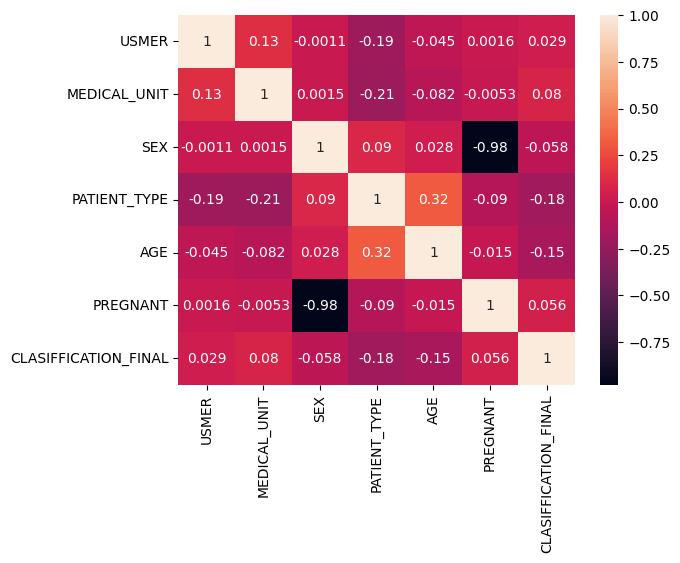

In [136]:
corr = df.corr()
sns.heatmap(corr, annot=True, cbar=True)

## Entrenamiento de los modelos

In [137]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

def show_metrics(clf, y_test, y_pred):
    print(f'Accuracy score: {int(accuracy_score(y_test, y_pred)*100)}%\n')
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=clf.classes_)
    disp.plot()
    plt.show()

In [138]:
from sklearn.model_selection import train_test_split

X = df.drop("CLASIFFICATION_FINAL", axis=1).values
y = df["CLASIFFICATION_FINAL"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aquí almacenaremos el rendimiento de cada algoritmo para su posterior comparación
algorithm_accuracy = []

### Regresión logística

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and bei

Accuracy score: 52%

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1681
           2       0.00      0.00      0.00       370
           3       0.53      0.32      0.40     76240
           4       0.00      0.00      0.00       620
           5       0.00      0.00      0.00      5283
           6       0.09      0.00      0.00     25696
           7       0.52      0.85      0.65     99825

    accuracy                           0.52    209715
   macro avg       0.16      0.17      0.15    209715
weighted avg       0.45      0.52      0.45    209715



/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


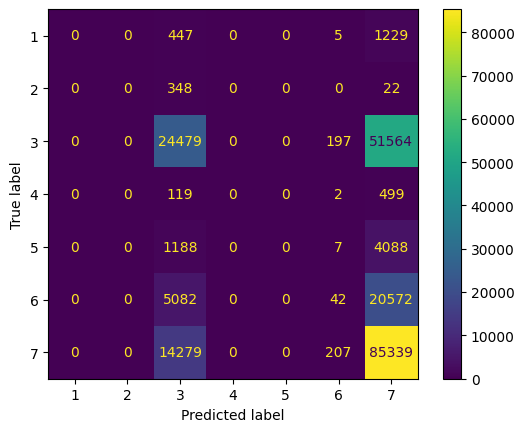

In [139]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='newton-cg', multi_class='auto')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

show_metrics(logreg, y_test, y_pred)
algorithm_accuracy.append((logreg, accuracy_score(y_test, y_pred)))

### Naïve Bayes

In [140]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'warn']
}

rf = LogisticRegression()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.4s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.1s
[CV] END .................multi_class=warn, solver=newton-cg; total time=   0.2s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.2s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.1s
[CV] END .....................multi_class=warn, solver=lbfgs; total time=   0.1s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.1s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.3s
[CV] END .................multi_class=warn, solver=liblinear; total time=   0.1s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.1s
[CV] END .......................multi_class=warn, solver=sag; total time=   0.1s
[CV] END .......................multi_class=warn

/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................multi_class=auto, solver=lbfgs; total time=  31.2s


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................multi_class=auto, solver=lbfgs; total time=  32.6s


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END .....................multi_class=auto, solver=lbfgs; total time=  33.5s


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................multi_class=auto, solver=sag; total time= 2.2min
[CV] END .......................multi_class=auto, solver=sag; total time= 2.1min
[CV] END .................multi_class=auto, solver=liblinear; total time= 2.2min
[CV] END .................multi_class=auto, solver=liblinear; total time= 2.2min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .......................multi_class=auto, solver=sag; total time= 2.2min
[CV] END .................multi_class=auto, solver=liblinear; total time= 2.3min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................multi_class=auto, solver=saga; total time= 2.4min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................multi_class=auto, solver=saga; total time= 2.4min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ......................multi_class=auto, solver=saga; total time= 2.4min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[CV] END .................multi_class=auto, solver=newton-cg; total time=11.0min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


[CV] END .................multi_class=auto, solver=newton-cg; total time=11.4min


/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV] END .................multi_class=auto, solver=newton-cg; total time=11.9min
Best params: {'multi_class': 'auto', 'solver': 'liblinear'}
Accuracy score:  
 0.5242495768066185
Confusion matrix: 
 [[    0     0   442     0     0     2  1237]
 [    0     0   347     0     0     0    23]
 [    0     0 24631     0     0    94 51515]
 [    0     0   120     0     0     1   499]
 [    0     0  1195     0     0     3  4085]
 [    0     0  5193     0     0    15 20488]
 [    0     0 14435     0     0    93 85297]]


Accuracy score: 40%

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      1681
           2       0.02      0.30      0.03       370
           3       0.56      0.11      0.19     76240
           4       0.00      0.00      0.00       620
           5       0.00      0.00      0.00      5283
           6       0.19      0.53      0.28     25696
           7       0.54      0.64      0.59     99825

    accuracy                           0.41    209715
   macro avg       0.19      0.23      0.16    209715
weighted avg       0.49      0.41      0.38    209715



/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pablo/dev-env-scripts/data_science/miniproject/.venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1374: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

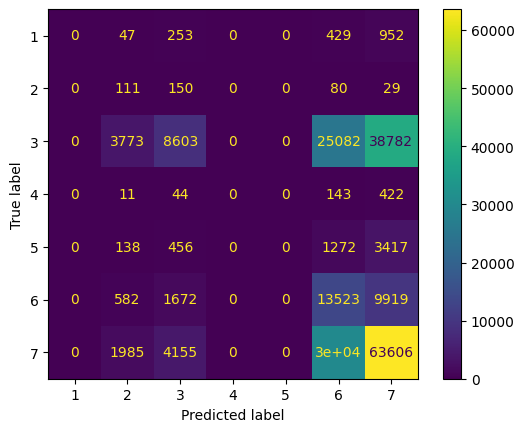

In [141]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB() 
gaussian.fit(X_train, y_train)  

y_pred = gaussian.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
show_metrics(gaussian, y_test, y_pred)

# algorithm_accuracy.append((gaussian, accuracy))

### Decision tree

Accuracy score: 53%

              precision    recall  f1-score   support

           1       0.11      0.00      0.01      1681
           2       0.00      0.00      0.00       370
           3       0.52      0.36      0.42     76240
           4       0.00      0.00      0.00       620
           5       0.03      0.00      0.00      5283
           6       0.45      0.09      0.15     25696
           7       0.54      0.82      0.65     99825

    accuracy                           0.53    209715
   macro avg       0.24      0.18      0.18    209715
weighted avg       0.50      0.53      0.48    209715



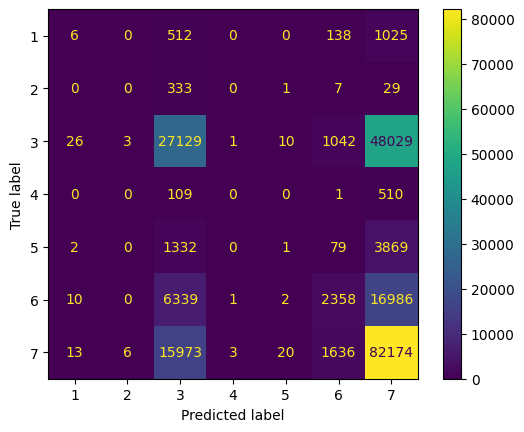

In [142]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

y_pred = decision_tree.predict(X_test)

show_metrics(decision_tree, y_test, y_pred)

**Grid search**

In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_samples_split': range(10,500,20),
    'max_depth': range(1,20,2),
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 3)

grid_search.fit(X_train, y_train)
print(f'Best params: {grid_search.best_params_}')

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy score:  \n {accuracy}')
print(f'Confusion matrix: \n {confusion_matrix(y_test, y_pred)}')

algorithm_accuracy.append((grid_search.best_estimator_, accuracy))

Fitting 3 folds for each of 250 candidates, totalling 750 fits
[CV 1/3] END .max_depth=1, min_samples_split=10;, score=0.516 total time=   0.7s
[CV 2/3] END .max_depth=1, min_samples_split=10;, score=0.515 total time=   0.7s
[CV 3/3] END .max_depth=1, min_samples_split=10;, score=0.517 total time=   0.7s
[CV 2/3] END .max_depth=1, min_samples_split=30;, score=0.515 total time=   0.8s
[CV 1/3] END .max_depth=1, min_samples_split=30;, score=0.516 total time=   0.8s
[CV 3/3] END .max_depth=1, min_samples_split=30;, score=0.517 total time=   0.8s
[CV 1/3] END .max_depth=1, min_samples_split=50;, score=0.516 total time=   0.9s
[CV 2/3] END .max_depth=1, min_samples_split=50;, score=0.515 total time=   0.9s
[CV 3/3] END .max_depth=1, min_samples_split=50;, score=0.517 total time=   0.8s
[CV 1/3] END .max_depth=1, min_samples_split=70;, score=0.516 total time=   0.8s
[CV 2/3] END .max_depth=1, min_samples_split=70;, score=0.515 total time=   0.9s
[CV 3/3] END .max_depth=1, min_samples_split=7

### Random forest

Accuracy score: 53%

              precision    recall  f1-score   support

           1       0.12      0.00      0.00      1681
           2       0.00      0.00      0.00       370
           3       0.53      0.35      0.42     76240
           4       0.00      0.00      0.00       620
           5       0.03      0.00      0.00      5283
           6       0.45      0.09      0.15     25696
           7       0.54      0.83      0.65     99825

    accuracy                           0.53    209715
   macro avg       0.24      0.18      0.18    209715
weighted avg       0.50      0.53      0.48    209715



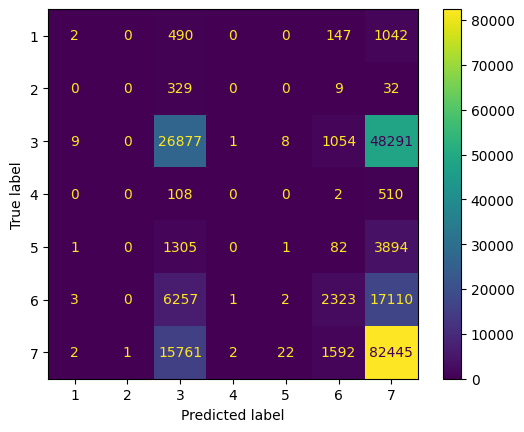

In [144]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

show_metrics(random_forest, y_test, y_pred)

In [145]:
importances = pd.DataFrame(
    {'feature':df.drop("CLASIFFICATION_FINAL", axis=1).columns,
     'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
AGE,0.357
MEDICAL_UNIT,0.287
PATIENT_TYPE,0.233
SEX,0.016
PREGNANT,0.014
DIABETES,0.010
COPD,0.009
OBESITY,0.009
INMSUPR,0.009


<AxesSubplot: xlabel='feature'>

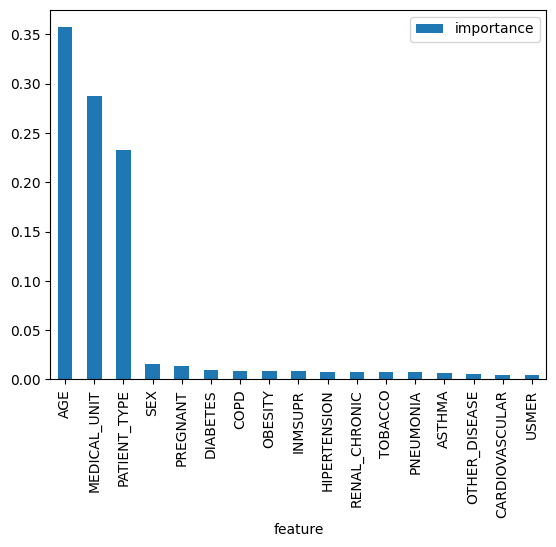

In [146]:
importances.plot.bar()